In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('TCGA_PRAD_CADD.csv',skiprows=1,sep='\t')
df

/tmp/ipykernel_4667/2462913203.py:1: DtypeWarning: Columns (0,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TCGA_PRAD_CADD.csv',skiprows=1,sep='\t')


,#Chrom,Pos,Ref,Alt,Type,Length,AnnoType,Consequence,ConsScore,ConsDetail,...,Freq10000bp,Rare10000bp,Sngl10000bp,EnsembleRegulatoryFeature,dbscSNV-ada_score,dbscSNV-rf_score,RemapOverlapTF,RemapOverlapCL,RawScore,PHRED
0,1,973847,G,T,SNV,0,CodingTranscript,NON_SYNONYMOUS,7,missense,...,32.0,99.0,1843.0,NaN,NaN,NaN,10.0,12.0,0.858494,9989.00
1,1,973847,G,T,SNV,0,Intergenic,DOWNSTREAM,1,downstream,...,32.0,99.0,1843.0,NaN,NaN,NaN,10.0,12.0,0.858494,9989.00
2,1,1051579,G,A,SNV,0,CodingTranscript,NON_SYNONYMOUS,7,missense,...,35.0,121.0,2073.0,CTCF Binding Site,NaN,NaN,17.0,20.0,-0.740164,35.00
3,1,1051579,G,A,SNV,0,Intergenic,UPSTREAM,1,upstream,...,35.0,121.0,2073.0,CTCF Binding Site,NaN,NaN,17.0,20.0,-0.740164,35.00
4,1,1051579,G,A,SNV,0,RegulatoryFeature,REGULATORY,4,regulatory,...,35.0,121.0,2073.0,CTCF Binding Site,NaN,NaN,17.0,20.0,-0.740164,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21675,Y,12911850,A,G,SNV,0,CodingTranscript,NON_SYNONYMOUS,7,missense,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.276633,29.40
21676,Y,12911955,G,T,SNV,0,CodingTranscript,STOP_GAINED,8,stop_gained,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,15.097202,65.00
21677,Y,12917058,A,T,SNV,0,CodingTranscript,NON_SYNONYMOUS,7,"splice,missense",...,NaN,NaN,NaN,NaN,0.52539,0.39,NaN,NaN,7.915494,40.00
21678,Y,20768887,G,A,SNV,0,CodingTranscript,NON_SYNONYMOUS,7,missense,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.974169,19.06


In [3]:
df["key"] = "chr" + df["#Chrom"].astype(str) + ";" + df["Pos"].astype(str) + ";" + df["Ref"] + ";" + df["Alt"]
df

,#Chrom,Pos,Ref,Alt,Type,Length,AnnoType,Consequence,ConsScore,ConsDetail,...,Rare10000bp,Sngl10000bp,EnsembleRegulatoryFeature,dbscSNV-ada_score,dbscSNV-rf_score,RemapOverlapTF,RemapOverlapCL,RawScore,PHRED,key
0,1,973847,G,T,SNV,0,CodingTranscript,NON_SYNONYMOUS,7,missense,...,99.0,1843.0,NaN,NaN,NaN,10.0,12.0,0.858494,9989.00,chr1;973847;G;T
1,1,973847,G,T,SNV,0,Intergenic,DOWNSTREAM,1,downstream,...,99.0,1843.0,NaN,NaN,NaN,10.0,12.0,0.858494,9989.00,chr1;973847;G;T
2,1,1051579,G,A,SNV,0,CodingTranscript,NON_SYNONYMOUS,7,missense,...,121.0,2073.0,CTCF Binding Site,NaN,NaN,17.0,20.0,-0.740164,35.00,chr1;1051579;G;A
3,1,1051579,G,A,SNV,0,Intergenic,UPSTREAM,1,upstream,...,121.0,2073.0,CTCF Binding Site,NaN,NaN,17.0,20.0,-0.740164,35.00,chr1;1051579;G;A
4,1,1051579,G,A,SNV,0,RegulatoryFeature,REGULATORY,4,regulatory,...,121.0,2073.0,CTCF Binding Site,NaN,NaN,17.0,20.0,-0.740164,35.00,chr1;1051579;G;A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21675,Y,12911850,A,G,SNV,0,CodingTranscript,NON_SYNONYMOUS,7,missense,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.276633,29.40,chrY;12911850;A;G
21676,Y,12911955,G,T,SNV,0,CodingTranscript,STOP_GAINED,8,stop_gained,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,15.097202,65.00,chrY;12911955;G;T
21677,Y,12917058,A,T,SNV,0,CodingTranscript,NON_SYNONYMOUS,7,"splice,missense",...,NaN,NaN,NaN,0.52539,0.39,NaN,NaN,7.915494,40.00,chrY;12917058;A;T
21678,Y,20768887,G,A,SNV,0,CodingTranscript,NON_SYNONYMOUS,7,missense,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.974169,19.06,chrY;20768887;G;A


In [4]:
dfCADD = df[['#Chrom','Pos','Ref','Alt','key','PHRED']]
dfCADD

,#Chrom,Pos,Ref,Alt,key,PHRED
0,1,973847,G,T,chr1;973847;G;T,9989.00
1,1,973847,G,T,chr1;973847;G;T,9989.00
2,1,1051579,G,A,chr1;1051579;G;A,35.00
3,1,1051579,G,A,chr1;1051579;G;A,35.00
4,1,1051579,G,A,chr1;1051579;G;A,35.00
...,...,...,...,...,...,...
21675,Y,12911850,A,G,chrY;12911850;A;G,29.40
21676,Y,12911955,G,T,chrY;12911955;G;T,65.00
21677,Y,12917058,A,T,chrY;12917058;A;T,40.00
21678,Y,20768887,G,A,chrY;20768887;G;A,19.06


In [5]:
dfCADD_2 = dfCADD[['key','PHRED']]
dfCADD_3 = dfCADD_2.set_index('key')
print(dfCADD_3)
dfCADD_4 = dfCADD_3.T
print(dfCADD_4)
D = dfCADD_4.to_dict()
D

/tmp/ipykernel_4667/35482730.py:6: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  D = dfCADD_4.to_dict()


                     PHRED
key                       
chr1;973847;G;T    9989.00
chr1;973847;G;T    9989.00
chr1;1051579;G;A     35.00
chr1;1051579;G;A     35.00
chr1;1051579;G;A     35.00
...                    ...
chrY;12911850;A;G    29.40
chrY;12911955;G;T    65.00
chrY;12917058;A;T    40.00
chrY;20768887;G;A    19.06
chrY;21904171;C;T  7133.00

[21680 rows x 1 columns]
key    chr1;973847;G;T  chr1;973847;G;T  chr1;1051579;G;A  chr1;1051579;G;A  \
PHRED           9989.0           9989.0              35.0              35.0   

key    chr1;1051579;G;A  chr1;1085879;T;G  chr1;1267925;C;T  chr1;1314925;T;A  \
PHRED              35.0              27.2              24.8              28.5   

key    chr1;1314925;T;A  chr1;1314925;T;A  ...  chrY;5099154;G;A  \
PHRED              28.5              28.5  ...              24.3   

key    chrY;5099224;G;A  chrY;5100144;G;T  chrY;6246332;G;A  chrY;6246332;G;A  \
PHRED              51.0              23.9             13.69             13.69   

k

{'chr1;973847;G;T': {'PHRED': 9989.0},
 'chr1;1051579;G;A': {'PHRED': 35.0},
 'chr1;1085879;T;G': {'PHRED': 27.2},
 'chr1;1267925;C;T': {'PHRED': 24.8},
 'chr1;1314925;T;A': {'PHRED': 28.5},
 'chr1;1341807;T;C': {'PHRED': 32.0},
 'chr1;1374289;G;C': {'PHRED': 23.4},
 'chr1;1374290;A;C': {'PHRED': 19.9},
 'chr1;1390528;C;G': {'PHRED': 24.0},
 'chr1;1395457;T;C': {'PHRED': 22.7},
 'chr1;1405823;C;A': {'PHRED': 19.02},
 'chr1;1649599;C;T': {'PHRED': 26.1},
 'chr1;1789119;G;T': {'PHRED': 24.3},
 'chr1;1922987;T;A': {'PHRED': 60.0},
 'chr1;1968778;T;G': {'PHRED': 14.64},
 'chr1;2025587;G;A': {'PHRED': 21.8},
 'chr1;2146093;G;C': {'PHRED': 23.0},
 'chr1;2150881;G;A': {'PHRED': 28.8},
 'chr1;2173951;G;T': {'PHRED': 25.2},
 'chr1;2479958;C;T': {'PHRED': 31.0},
 'chr1;2484463;G;A': {'PHRED': 24.0},
 'chr1;2606361;C;A': {'PHRED': 33.0},
 'chr1;3411906;C;T': {'PHRED': 14.54},
 'chr1;3425693;G;A': {'PHRED': 25.8},
 'chr1;3505466;C;T': {'PHRED': 22.7},
 'chr1;3510824;T;C': {'PHRED': 21.7},
 'chr1;3

In [6]:
df2 = pd.read_csv('TCGA_prad_maf.csv',sep=',')
df2

/tmp/ipykernel_4667/3152739471.py:1: DtypeWarning: Columns (87,88,118) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('TCGA_prad_maf.csv',sep=',')


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status,GDC_Valid_Somatic,vcf_region,vcf_info,vcf_format,vcf_tumor_gt,vcf_normal_gt
0,CCDC158,339965,BI,GRCh38,chr4,76403219,76403219,+,5'UTR,SNP,...,NaN,NaN,False,Unknown,False,chr4:76403219:.:C:T,"ACGTNacgtnMINUS=0,1,0,0,0,0,24,0,2,0;ACGTNacgt...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:44,3:0.067:1:2:0.667:1523,98:20:24","0/0:39,0:0:0:0:.:1276,0:19:20"
1,PCDHA4,56144,BI,GRCh38,chr5,140808044,140808044,+,Missense_Mutation,SNP,...,NaN,COSM1433779;COSM72091,True,Unknown,False,chr5:140808044:.:C:T,"ACGTNacgtnMINUS=0,21,0,1,0,0,16,0,2,0;ACGTNacg...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:94,6:0.045:3:3:0.5:2784,191:54:40","0/0:96,0:0:0:0:.:2701,0:40:56"
2,SLU7,10569,BI,GRCh38,chr5,160407869,160407869,+,Intron,SNP,...,NonExonic;bitgt,NaN,False,Unknown,False,chr5:160407869:.:G:A,"ACGTNacgtnMINUS=4,0,21,0,0,0,0,13,0,0;ACGTNacg...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:69,6:0.068:2:4:0.333:1930,188:36:33","0/0:54,0:0:0:0:.:1476,0:24:30"
3,GOLGA7,51125,BI,GRCh38,chr8,41511759,41511759,+,3'Flank,SNP,...,bitgt,NaN,False,Unknown,False,chr8:41511759:.:C:T,"ACGTNacgtnMINUS=0,4,0,0,0,1,36,0,0,0;ACGTNacgt...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:81,7:0.072:7:0:0:2173,194:39:42","0/0:60,0:0:0:0:.:1512,0:32:28"
4,KCTD19,146212,BI,GRCh38,chr16,67301815,67301815,+,Missense_Mutation,SNP,...,NaN,COSM3672302,True,Unknown,False,chr16:67301815:rs763382763:C:T,"ACGTNacgtnMINUS=0,53,0,1,0,1,98,0,4,0;ACGTNacg...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:269,16:0.042:11:5:0.313:7378,494:112:157","0/0:249,0:0:0:0:.:6501,0:110:139"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35135,GLRA2,2742,BI,GRCh38,chrX,14581254,14581261,+,Frame_Shift_Del,DEL,...,NaN,NaN,True,Unknown,False,chrX:14581253:.:ATGACTCCC:A,ECNT=1;HCNT=2;MAX_ED=.;MIN_ED=.;NLOD=20.77;TLO...,GT:AD:AF:ALT_F1R2:ALT_F2R1:QSS:REF_F1R2:REF_F2R1,"0/1:36,26:0.426:17:9:1082,768:20:16","0/0:78,0:0:0:0:2375,0:49:29"
35136,PHKA2,5256,BI,GRCh38,chrX,18894338,18894338,+,Missense_Mutation,SNP,...,NaN,COSM371211,True,Unknown,False,chrX:18894338:rs754449318:C:T,"ACGTNacgtnMINUS=0,5,0,2,0,0,6,0,1,0;ACGTNacgtn...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:41,4:0.086:0:4:1:1073,133:29:12","0/0:42,0:0:0:0:.:1236,0:21:21"
35137,CYBB,1536,BI,GRCh38,chrX,37782121,37782121,+,Missense_Mutation,SNP,...,NaN,NaN,True,Unknown,False,chrX:37782121:.:G:C,"ACGTNacgtnMINUS=0,2,12,0,0,0,1,6,0,0;ACGTNacgt...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:46,5:0.091:1:4:0.2:1449,170:26:20","0/0:55,0:0:0:0:.:1818,0:22:33"
35138,AWAT1,158833,BI,GRCh38,chrX,70238212,70238212,+,Missense_Mutation,SNP,...,NaN,NaN,True,Unknown,False,chrX:70238212:.:G:T,"ACGTNacgtnMINUS=0,0,9,1,0,0,0,1,2,0;ACGTNacgtn...",GT:AD:AF:ALT_F1R2:ALT_F2R1:FOXOG:QSS:REF_F1R2:...,"0/1:27,5:0.179:2:3:0.4:863,162:17:10","0/0:42,0:0:0:0:.:1389,0:28:14"


In [7]:
dfMAF = df2[['Hugo_Symbol','Chromosome','Start_Position','Reference_Allele','Allele','Tumor_Sample_Barcode']]
dfMAF

,Hugo_Symbol,Chromosome,Start_Position,Reference_Allele,Allele,Tumor_Sample_Barcode
0,CCDC158,chr4,76403219,C,T,TCGA-G9-6353-01A-11D-1961-08
1,PCDHA4,chr5,140808044,C,T,TCGA-G9-6353-01A-11D-1961-08
2,SLU7,chr5,160407869,G,A,TCGA-G9-6353-01A-11D-1961-08
3,GOLGA7,chr8,41511759,C,T,TCGA-G9-6353-01A-11D-1961-08
4,KCTD19,chr16,67301815,C,T,TCGA-G9-6353-01A-11D-1961-08
...,...,...,...,...,...,...
35135,GLRA2,chrX,14581254,TGACTCCC,-,TCGA-V1-A9OH-01A-11D-A41K-08
35136,PHKA2,chrX,18894338,C,T,TCGA-V1-A9OH-01A-11D-A41K-08
35137,CYBB,chrX,37782121,G,C,TCGA-V1-A9OH-01A-11D-A41K-08
35138,AWAT1,chrX,70238212,G,T,TCGA-V1-A9OH-01A-11D-A41K-08


In [8]:
dfMAF["key"] = dfMAF["Chromosome"] + ";" + dfMAF["Start_Position"].astype(str) + ";" + dfMAF["Reference_Allele"] + ";" + dfMAF["Allele"]
dfMAF

/tmp/ipykernel_4667/1970922510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMAF["key"] = dfMAF["Chromosome"] + ";" + dfMAF["Start_Position"].astype(str) + ";" + dfMAF["Reference_Allele"] + ";" + dfMAF["Allele"]


,Hugo_Symbol,Chromosome,Start_Position,Reference_Allele,Allele,Tumor_Sample_Barcode,key
0,CCDC158,chr4,76403219,C,T,TCGA-G9-6353-01A-11D-1961-08,chr4;76403219;C;T
1,PCDHA4,chr5,140808044,C,T,TCGA-G9-6353-01A-11D-1961-08,chr5;140808044;C;T
2,SLU7,chr5,160407869,G,A,TCGA-G9-6353-01A-11D-1961-08,chr5;160407869;G;A
3,GOLGA7,chr8,41511759,C,T,TCGA-G9-6353-01A-11D-1961-08,chr8;41511759;C;T
4,KCTD19,chr16,67301815,C,T,TCGA-G9-6353-01A-11D-1961-08,chr16;67301815;C;T
...,...,...,...,...,...,...,...
35135,GLRA2,chrX,14581254,TGACTCCC,-,TCGA-V1-A9OH-01A-11D-A41K-08,chrX;14581254;TGACTCCC;-
35136,PHKA2,chrX,18894338,C,T,TCGA-V1-A9OH-01A-11D-A41K-08,chrX;18894338;C;T
35137,CYBB,chrX,37782121,G,C,TCGA-V1-A9OH-01A-11D-A41K-08,chrX;37782121;G;C
35138,AWAT1,chrX,70238212,G,T,TCGA-V1-A9OH-01A-11D-A41K-08,chrX;70238212;G;T


In [9]:
dfMAF["patient"] = dfMAF["Tumor_Sample_Barcode"].str.slice(0,12)
dfMAF

/tmp/ipykernel_4667/559960967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMAF["patient"] = dfMAF["Tumor_Sample_Barcode"].str.slice(0,12)


,Hugo_Symbol,Chromosome,Start_Position,Reference_Allele,Allele,Tumor_Sample_Barcode,key,patient
0,CCDC158,chr4,76403219,C,T,TCGA-G9-6353-01A-11D-1961-08,chr4;76403219;C;T,TCGA-G9-6353
1,PCDHA4,chr5,140808044,C,T,TCGA-G9-6353-01A-11D-1961-08,chr5;140808044;C;T,TCGA-G9-6353
2,SLU7,chr5,160407869,G,A,TCGA-G9-6353-01A-11D-1961-08,chr5;160407869;G;A,TCGA-G9-6353
3,GOLGA7,chr8,41511759,C,T,TCGA-G9-6353-01A-11D-1961-08,chr8;41511759;C;T,TCGA-G9-6353
4,KCTD19,chr16,67301815,C,T,TCGA-G9-6353-01A-11D-1961-08,chr16;67301815;C;T,TCGA-G9-6353
...,...,...,...,...,...,...,...,...
35135,GLRA2,chrX,14581254,TGACTCCC,-,TCGA-V1-A9OH-01A-11D-A41K-08,chrX;14581254;TGACTCCC;-,TCGA-V1-A9OH
35136,PHKA2,chrX,18894338,C,T,TCGA-V1-A9OH-01A-11D-A41K-08,chrX;18894338;C;T,TCGA-V1-A9OH
35137,CYBB,chrX,37782121,G,C,TCGA-V1-A9OH-01A-11D-A41K-08,chrX;37782121;G;C,TCGA-V1-A9OH
35138,AWAT1,chrX,70238212,G,T,TCGA-V1-A9OH-01A-11D-A41K-08,chrX;70238212;G;T,TCGA-V1-A9OH


In [10]:
df_aggr = pd.read_csv('clinical.tsvaggresive.csv')
aggr_patients = df_aggr['case_submitter_id'].tolist()
df_non_aggr = pd.read_csv('clinical.tsvnon-aggresive.csv')
non_aggr_patients = df_non_aggr['case_submitter_id'].tolist()
print(len(aggr_patients))
len(non_aggr_patients)

158


696

In [11]:
genes = {}
genes_aggr = {}
genes_non_aggr = {}
patients_aggr = []
patients_non_aggr = []
patients = []
samples =  []
with open('CADD.pl', 'w') as f:
    with open('CADD_aggr.pl', 'w') as f_aggr:
        with open('CADD_non_aggr.pl', 'w') as f_non_aggr:    
            with open('no_CADD_score_found.pl', 'w') as g:
                for i in dfMAF.index:
                    if dfMAF._get_value(i,'key') in D:
                        f.write('gene_patient_probability(\'' + dfMAF._get_value(i,'Hugo_Symbol') + '\',\'' + dfMAF._get_value(i,'patient') + '\',' + str(1/(1+np.exp((15-(D[dfMAF._get_value(i,'key')]['PHRED']))/2))) + ').')
                        f.write('\n')
                        if dfMAF._get_value(i,'Hugo_Symbol') in genes:
                            genes[dfMAF._get_value(i,'Hugo_Symbol')] = genes[dfMAF._get_value(i,'Hugo_Symbol')] + 1
                        else:
                            genes[dfMAF._get_value(i,'Hugo_Symbol')] = 1
                        if dfMAF._get_value(i,'patient') not in patients:
                            patients.append(dfMAF._get_value(i,'patient'))
                        if dfMAF._get_value(i,'Tumor_Sample_Barcode') not in samples:
                            samples.append(dfMAF._get_value(i,'Tumor_Sample_Barcode'))  
                        if dfMAF._get_value(i,'patient') in aggr_patients:
                            if dfMAF._get_value(i,'Hugo_Symbol') in genes_aggr:
                                genes_aggr[dfMAF._get_value(i,'Hugo_Symbol')] = genes_aggr[dfMAF._get_value(i,'Hugo_Symbol')] + 1
                            else:
                                genes_aggr[dfMAF._get_value(i,'Hugo_Symbol')] = 1
                            if dfMAF._get_value(i,'patient') not in patients_aggr:
                                patients_aggr.append(dfMAF._get_value(i,'patient'))
                            f_aggr.write('gene_patient_probability(\'' + dfMAF._get_value(i,'Hugo_Symbol') + '\',\'' + dfMAF._get_value(i,'patient') + '\',' + str(1/(1+np.exp((15-(D[dfMAF._get_value(i,'key')]['PHRED']))/2))) + ').')
                            f_aggr.write('\n')
                        if dfMAF._get_value(i,'patient') in non_aggr_patients:
                            if dfMAF._get_value(i,'Hugo_Symbol') in genes_non_aggr:
                                genes_non_aggr[dfMAF._get_value(i,'Hugo_Symbol')] = genes_non_aggr[dfMAF._get_value(i,'Hugo_Symbol')] + 1
                            else:
                                genes_non_aggr[dfMAF._get_value(i,'Hugo_Symbol')] = 1
                            if dfMAF._get_value(i,'patient') not in patients_non_aggr:
                                patients_non_aggr.append(dfMAF._get_value(i,'patient'))
                            f_non_aggr.write('gene_patient_probability(\'' + dfMAF._get_value(i,'Hugo_Symbol') + '\',\'' + dfMAF._get_value(i,'patient') + '\',' + str(1/(1+np.exp((15-(D[dfMAF._get_value(i,'key')]['PHRED']))/2))) + ').')
                            f_non_aggr.write('\n')
                    else:
                        g.write('gene: ' + dfMAF._get_value(i,'Hugo_Symbol') + ', patient: ' + dfMAF._get_value(i,'patient') + ', key: ' + dfMAF._get_value(i,'key'))
                        g.write('\n')         
            g.close()
f.close()

In [12]:
print(len(patients))
print(len(patients_aggr))
print(len(patients_non_aggr))

493
79
341


array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

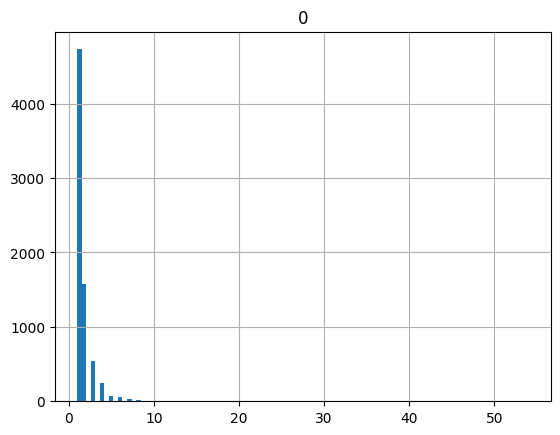

In [13]:
genes_df = pd.DataFrame.from_dict(genes, orient='index')
genes_df.sort_values(0,inplace = True,ascending=False)
genes_df
pd.DataFrame.hist(genes_df,bins=100)

In [14]:
aggr_genes_df = pd.DataFrame.from_dict(genes_aggr, orient='index')
aggr_genes_df.sort_values(0,inplace = True,ascending=False)
aggr_genes_df

,0
TP53,17
TTN,11
MUC16,6
SYNE1,6
USH2A,5
...,...
FPR3,1
KLK3,1
CD79A,1
HMG20B,1


In [15]:
non_aggr_genes_df = pd.DataFrame.from_dict(genes_non_aggr, orient='index')
non_aggr_genes_df.sort_values(0,inplace = True,ascending=False)
non_aggr_genes_df

,0
SPOP,44
TTN,31
TP53,20
MUC16,15
SPTA1,14
...,...
CIR1,1
MCM2,1
DVL3,1
ZNF330,1


In [ ]:
#Get gene length
#pip install pyensembl #To install the package
#pyensembl install --release 77 --species human #To install the reference genome
from pyensembl import EnsemblRelease
data = EnsemblRelease()#(109) Last human reference genome
data2 = EnsemblRelease(77)#Human reference genome GRCh38
genes_length = {}
notfound = []
found_lengths = [] 
for gene in genes.keys():
    try: 
        wg = data.genes_by_name(gene)
        genes_length[gene] = wg[0].end - wg[0].start
        found_lengths.append(wg[0].end - wg[0].start)
    except:
        try: 
            wg = data2.genes_by_name(gene)
            genes_length[gene] = wg[0].end - wg[0].start
            found_lengths.append(wg[0].end - wg[0].start)
        except : 
            notfound.append(gene)
print(len(notfound))           
avg_found_lengths = sum(found_lengths)/len(found_lengths)
print(avg_found_lengths) 
for gene in notfound:
    genes_length[gene] = avg_found_lengths

In [16]:
genes_df

,0
SPOP,54
TTN,48
TP53,38
MUC16,27
SPTA1,20
...,...
RAD21,1
SLC26A1,1
MICALL2,1
CCND3,1


In [ ]:
df_original = pd.DataFrame.copy(genes_df)

In [ ]:
# Not length corrected!
mf = genes_df
mf.sort_values(0,inplace = True,ascending=False)
mf = mf/len(samples) # mutation frequency
mf.sort_values(0,inplace = True,ascending=False)
mf

In [ ]:
mf_filtered = mf[mf[0]>0.015] 
mf_filtered

In [ ]:
# not length corrected
fig, ax = plt.subplots()
fig.set_size_inches(20,15)
fruits = mf_filtered.index
counts = mf_filtered[0].tolist()
counts = [x*100 for x in counts]
ax.bar(fruits, counts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size = 20)
ax.set_yticklabels(ax.get_yticklabels(), size = 20)
ax.figure
ax.set_ylabel('Mutation frequency (%)',size=20)
ax.set_title('Genes with a mutation frequency > 1,5%',size=20)
plt.savefig('mutation_frequency')
plt.show()

In [ ]:
with open('mutation_freq', 'w') as f:
    f.write('Fraction of the samples (' + str(len(samples)) + ')')
    f.write('\n')
    for i in mf.index:        
        f.write('' + i + ', ' + str(mf._get_value(i,0)))
        f.write('\n')
f.close()

In [ ]:
# not corrected for the length
Max = genes_df.max(0)
Max = int(Max)
data = np.zeros(Max)
index=np.int64(list(range(1,Max+1)))
genes_df2 = pd.DataFrame(data, index=index)
for i in genes_df.index:
    a = genes_df2._get_value(genes_df._get_value(i,0),0)
    genes_df2._set_value(genes_df._get_value(i,0),0,a+1)
l = []
for i in range(Max):
    l.append((genes_df2.to_numpy()[0:i]).sum())
genes_df2['fewer'] = l
genes_df2['coverage'] = genes_df2['fewer']/len(genes_df)
genes_df2

In [ ]:
# Not corrected
intro = ['%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%',
'% WHEN PERFORMING EXPERIMENTS ON YOUR OWN DATA,',
'% SPECIFY YOUR COVERAGE DATA USING gene_coverage_helper/2 (i.e. replace those facts)',
'% AND ENSURE THE FOLLOWING HEADER IS INCLUDED IN YOUR COVERAGE DATA FILE',
'%',
'% HEADER START',
'%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%',
'',
'gene_coverage(X, Y) :-',
'    ( gene_coverage_helper(X, Y) ->', 
'          true',
'    ;',
'          Y = 0',
'    ).',
'',
'%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%',
'% HEADER END',
'%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%','']

with open('coverage.pl', 'w') as f:
    for i in intro:
        f.write(i)
        f.write('\n')
    for i in genes_df.index:        
        f.write('gene_coverage_helper(\'' + i + '\',' + str(genes_df2._get_value(genes_df._get_value(i,0),'coverage'))+').')
        f.write('\n')
f.close()

In [ ]:
genes_df_corrected = genes_df
for i in genes_df.index.values.tolist():
    genes_df_corrected.at[i,0] = round(genes_df.at[i,0]*avg_found_lengths/genes_length[i])+1
genes_df_corrected.sort_values(0,inplace = True,ascending=False)
genes_df_corrected

In [ ]:
# Corrected for the length
Max = genes_df_corrected.max(0)
Max = int(Max)
data = np.zeros(Max)
index=np.int64(list(range(1,Max+1)))
genes_df2_corrected = pd.DataFrame(data, index=index)
for i in genes_df_corrected.index:
    a = genes_df2_corrected._get_value(genes_df_corrected._get_value(i,0),0)
    genes_df2_corrected._set_value(genes_df_corrected._get_value(i,0),0,a+1)
l = []
for i in range(Max):
    l.append((genes_df2_corrected.to_numpy()[0:i]).sum())
genes_df2_corrected['fewer'] = l
genes_df2_corrected['coverage'] = genes_df2_corrected['fewer']/len(genes_df_corrected)
genes_df2_corrected

In [ ]:
# Corrected
intro = ['%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%',
'% WHEN PERFORMING EXPERIMENTS ON YOUR OWN DATA,',
'% SPECIFY YOUR COVERAGE DATA USING gene_coverage_helper/2 (i.e. replace those facts)',
'% AND ENSURE THE FOLLOWING HEADER IS INCLUDED IN YOUR COVERAGE DATA FILE',
'%',
'% HEADER START',
'%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%',
'',
'gene_coverage(X, Y) :-',
'    ( gene_coverage_helper(X, Y) ->', 
'          true',
'    ;',
'          Y = 0',
'    ).',
'',
'%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%',
'% HEADER END',
'%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%','']

with open('coverage_corrected.pl', 'w') as f:
    for i in intro:
        f.write(i)
        f.write('\n')
    for i in genes_df_corrected.index:        
        f.write('gene_coverage_helper(\'' + i + '\',' + str(genes_df2_corrected._get_value(genes_df_corrected._get_value(i,0),'coverage')) + ').')
        f.write('\n')
f.close()

In [ ]:
aggr_genes_df_corrected = aggr_genes_df
for i in aggr_genes_df.index.values.tolist():
    aggr_genes_df_corrected.at[i,0] = round(aggr_genes_df.at[i,0]*avg_found_lengths/genes_length[i])+1
aggr_genes_df_corrected.sort_values(0,inplace = True,ascending=False)
aggr_genes_df_corrected

In [17]:
# Not corrected for the length
Max = aggr_genes_df.max(0)
Max = int(Max)
data = np.zeros(Max)
index=np.int64(list(range(1,Max+1)))
aggr_genes_df2 = pd.DataFrame(data, index=index)
for i in aggr_genes_df.index:
    a = aggr_genes_df2._get_value(aggr_genes_df._get_value(i,0),0)
    aggr_genes_df2._set_value(aggr_genes_df._get_value(i,0),0,a+1)
l = []
for i in range(Max):
    l.append((aggr_genes_df2.to_numpy()[0:i]).sum())
aggr_genes_df2['fewer'] = l
aggr_genes_df2['coverage'] = aggr_genes_df2['fewer']/len(aggr_genes_df)
aggr_genes_df2

,0,fewer,coverage
1,1549.0,0.0,0.000000
2,145.0,1549.0,0.895376
3,24.0,1694.0,0.979191
4,4.0,1718.0,0.993064
5,4.0,1722.0,0.995376
6,2.0,1726.0,0.997688
7,0.0,1728.0,0.998844
8,0.0,1728.0,0.998844
9,0.0,1728.0,0.998844
10,0.0,1728.0,0.998844


In [18]:
# Not corrected
intro = ['%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%',
'% WHEN PERFORMING EXPERIMENTS ON YOUR OWN DATA,',
'% SPECIFY YOUR COVERAGE DATA USING gene_coverage_helper/2 (i.e. replace those facts)',
'% AND ENSURE THE FOLLOWING HEADER IS INCLUDED IN YOUR COVERAGE DATA FILE',
'%',
'% HEADER START',
'%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%',
'',
'gene_coverage(X, Y) :-',
'    ( gene_coverage_helper(X, Y) ->', 
'          true',
'    ;',
'          Y = 0',
'    ).',
'',
'%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%',
'% HEADER END',
'%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%','']

with open('coverage_aggr.pl', 'w') as f:
    for i in intro:
        f.write(i)
        f.write('\n')
    for i in aggr_genes_df.index:        
        f.write('gene_coverage_helper(\'' + i + '\',' + str(aggr_genes_df2._get_value(aggr_genes_df._get_value(i,0),'coverage')) + ').')
        f.write('\n')
f.close()

In [ ]:
non_aggr_genes_df_corrected = non_aggr_genes_df
for i in non_aggr_genes_df.index.values.tolist():
    non_aggr_genes_df_corrected.at[i,0] = round(non_aggr_genes_df.at[i,0]*avg_found_lengths/genes_length[i])+1
non_aggr_genes_df_corrected.sort_values(0,inplace = True,ascending=False)
non_aggr_genes_df_corrected

In [19]:
# Not corrected for the length
Max = non_aggr_genes_df.max(0)
Max = int(Max)
data = np.zeros(Max)
index=np.int64(list(range(1,Max+1)))
non_aggr_genes_df2 = pd.DataFrame(data, index=index)
for i in non_aggr_genes_df.index:
    a = non_aggr_genes_df2._get_value(non_aggr_genes_df._get_value(i,0),0)
    non_aggr_genes_df2._set_value(non_aggr_genes_df._get_value(i,0),0,a+1)
l = []
for i in range(Max):
    l.append((non_aggr_genes_df2.to_numpy()[0:i]).sum())
non_aggr_genes_df2['fewer'] = l
non_aggr_genes_df2['coverage'] = non_aggr_genes_df2['fewer']/len(non_aggr_genes_df)
non_aggr_genes_df2

,0,fewer,coverage
1,3993.0,0.0,0.000000
2,1079.0,3993.0,0.712273
3,338.0,5072.0,0.904745
4,97.0,5410.0,0.965037
5,46.0,5507.0,0.982340
6,18.0,5553.0,0.990546
7,7.0,5571.0,0.993757
8,11.0,5578.0,0.995005
9,5.0,5589.0,0.996968
10,2.0,5594.0,0.997859


In [20]:
# not corrected
intro = ['%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%',
'% WHEN PERFORMING EXPERIMENTS ON YOUR OWN DATA,',
'% SPECIFY YOUR COVERAGE DATA USING gene_coverage_helper/2 (i.e. replace those facts)',
'% AND ENSURE THE FOLLOWING HEADER IS INCLUDED IN YOUR COVERAGE DATA FILE',
'%',
'% HEADER START',
'%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%',
'',
'gene_coverage(X, Y) :-',
'    ( gene_coverage_helper(X, Y) ->', 
'          true',
'    ;',
'          Y = 0',
'    ).',
'',
'%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%',
'% HEADER END',
'%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%','']

with open('coverage_non_aggr.pl', 'w') as f:
    for i in intro:
        f.write(i)
        f.write('\n')
    for i in non_aggr_genes_df.index:        
        f.write('gene_coverage_helper(\'' + i + '\',' + str(non_aggr_genes_df2._get_value(non_aggr_genes_df._get_value(i,0),'coverage')) + ').')
        f.write('\n')
f.close()

In [ ]:
genes_df

In [ ]:
genes_length

In [ ]:
df_original

In [ ]:
df_original.index

In [ ]:
lengths_log = []
lengths = []
for gene in df_original.index:
    lengths_log.append(math.log(genes_length[gene],10))
    lengths.append(genes_length[gene])   

In [ ]:
y = df_original.values
text = df_original.index

In [ ]:
plt.scatter(lengths,y)
for i in range(5):
    plt.annotate(text[i], (lengths[i]+20000, y[i]))
    
plt.ylabel('Number of samples')
plt.xlabel('Gene length')
plt.title('Mutations')
plt.savefig('gene_length_vs_number_of_samples')

In [ ]:
plt.scatter(lengths_log,y)
for i in range(5):
    plt.annotate(text[i], (lengths_log[i]+0.05, y[i]))
    
plt.ylabel('Number of samples')
plt.xlabel('log(gene length)')
plt.title('Mutations')
plt.savefig('gene_length_vs_number_of_samples_log')